In [1]:
import os
import numpy as np
import numpy as np
# import torch
# from arsf_envi_reader import envi_header
import shutil
import os
import json
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal,ogr,osr
from scipy.optimize import curve_fit
# from tqdm import tqdm
# import multiprocess as mp
from scipy import ndimage
from numpy import trapz

In [2]:
folder_path = r"E:\wenqu\numpy_file\npy_file\site6"


In [3]:

data_dict = {}

for file_name in os.listdir(folder_path):
    if file_name.endswith(".npy"):
        variable_name = os.path.splitext(file_name)[0]  # Remove the file extension from the name
        variable_data = np.load(os.path.join(folder_path, file_name))
        data_dict[variable_name] = variable_data



In [4]:
data_dict

{'b100_mean': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'b100_std': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'b101_mean': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'b101_std': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0.

In [5]:
data_dict['b101_mean'].shape

(9106, 8882)

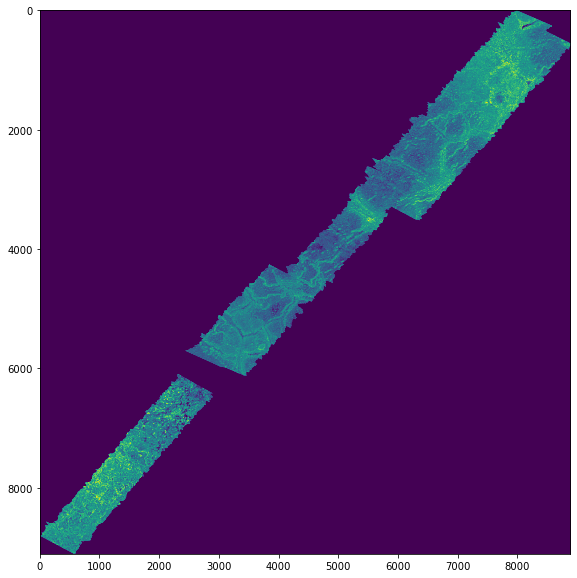

In [6]:
fig = plt.figure(figsize = (10,10))
plt.imshow(data_dict['b101_mean'] , interpolation='nearest')
plt.show()

# SLA

In [7]:
sla_trait = 0.219792*data_dict['b36_std'] + 0.150814*data_dict['b123_mean'] + -0.093699*data_dict['b66_std'] + 0.199008*data_dict['b64_std'] + -0.588889*data_dict['b102_std'] + -0.221419*data_dict['b34_std'] + 0.252131*data_dict['b109_mean'] + 0.078076*data_dict['b6_mean'] + 0.331060*data_dict['b91_mean'] + 0.087495*data_dict['b39_std'] + 0.515332*data_dict['b21_std'] + -0.331420*data_dict['b75_mean'] + 0.252356*data_dict['b17_std'] + -0.176426*data_dict['b35_std'] + 0.346296*data_dict['b45_std'] + 0.298782*data_dict['b40_std'] + -0.101041*data_dict['b73_mean'] + 0.271761*data_dict['b13_mean'] + 0.139634*data_dict['b101_std'] + -0.022854*data_dict['b31_std'] + 0.517783*data_dict['b49_std'] + -0.239468*data_dict['b7_std'] + -0.561350*data_dict['b53_mean'] + 0.146141*data_dict['b88_std'] + -0.057821*data_dict['b63_mean'] + -0.034535*data_dict['b41_mean'] + 0.330716*data_dict['b22_std'] + 0.321396*data_dict['b60_mean'] + -0.253976*data_dict['b102_mean'] + -0.003751*data_dict['b98_mean'] + -0.290756*data_dict['b1_std'] + 0.327980*data_dict['b6_std'] + 0.212259*data_dict['b113_std'] + -0.133372*data_dict['b22_mean'] + -0.184879*data_dict['b62_std'] + 0.111643*data_dict['b21_mean'] + 0.514728*data_dict['b90_mean'] + 0.252161*data_dict['b57_std'] + -0.172279*data_dict['b8_std'] + -0.310862*data_dict['b111_std'] + -0.462581*data_dict['b20_std'] + -0.273131*data_dict['b26_std'] + 0.057266*data_dict['b92_std'] + 0.262786*data_dict['b85_std'] + 0.323769*data_dict['b83_std'] + 0.332541*data_dict['b16_mean'] + -0.109225*data_dict['b7_mean'] + -0.656834*data_dict['b78_std'] + 0.058296*data_dict['b105_mean'] + 0.210296*data_dict['b115_std'] + -0.289476*data_dict['b121_std'] + -0.203681*data_dict['b56_std'] + 0.345728*data_dict['b89_std'] + 0.043517*data_dict['b68_std'] + 0.735007*data_dict['b16_std'] + -0.203404*data_dict['b114_std'] + 0.185724*data_dict['b95_std'] + -0.144544*data_dict['b42_std'] + 0.472189*data_dict['b104_mean'] + 0.275887*data_dict['b91_std'] + 0.466831*data_dict['b113_mean'] + -0.415193*data_dict['b98_std'] + 0.387708*data_dict['b97_std'] + 0.370087*data_dict['b67_std'] + -0.648415*data_dict['b41_std'] + -0.113365*data_dict['b11_std'] + 0.173359*data_dict['b96_std'] + -0.331871*data_dict['b82_std'] + -0.001173*data_dict['b119_std'] + 0.163000*data_dict['b65_std'] + -0.364424*data_dict['b19_mean'] + 0.032240*data_dict['b46_std'] + 0.358455*data_dict['b59_mean'] + -0.385762*data_dict['b44_std'] + -0.311821*data_dict['b60_std'] + 0.430645*data_dict['b48_std'] + 0.217593*data_dict['b2_mean'] + 0.081219*data_dict['b9_std'] + -0.426938*data_dict['b59_std'] + 0.160901*data_dict['b117_std'] + 0.317743*data_dict['b52_std'] + -0.465368*data_dict['b118_mean'] + -0.132119*data_dict['b61_std'] + -0.873601*data_dict['b25_std'] + -0.455091*data_dict['b86_std'] + -0.358108*data_dict['b107_std'] + 0.417056*data_dict['b108_std'] + 0.558898*data_dict['b116_std'] + -0.560055*data_dict['b12_std'] + 0.774772*data_dict['b29_std'] + -0.387424*data_dict['b8_mean'] + -0.876086*data_dict['b112_mean'] + -0.720364*data_dict['b103_std'] + 4.382242

In [8]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site2c\site2c_simulation_update1')

pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2c_sla_trait_trait.tif"
outPath ='E:/wenqu/trait_map/update1'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(sla_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# PC

In [9]:
pc_trait = 0.029148*data_dict['b52_std'] + 0.046455*data_dict['b22_mean'] + 0.088721*data_dict['b60_mean'] + 0.064071*data_dict['b113_std'] + -0.035357*data_dict['b9_mean'] + -0.032452*data_dict['b122_std'] + 0.008260*data_dict['b51_std'] + -0.038128*data_dict['b11_std'] + -0.042183*data_dict['b47_std'] + -0.030874*data_dict['b123_mean'] + -0.085464*data_dict['b103_mean'] + -0.005733*data_dict['b29_std'] + -0.001956*data_dict['b4_mean'] + 0.028279*data_dict['b14_mean'] + 0.080359*data_dict['b60_std'] + -0.049529*data_dict['b56_std'] + -0.077376*data_dict['b94_std'] + 0.056507*data_dict['b109_std'] + 0.026119*data_dict['b19_std'] + 0.047157*data_dict['b7_mean'] + 0.018890*data_dict['b19_mean'] + -0.065580*data_dict['b104_std'] + -0.063295*data_dict['b118_mean'] + 0.101895*data_dict['b24_mean'] + -0.025674*data_dict['b67_std'] + -0.037672*data_dict['b68_std'] + -0.078852*data_dict['b16_mean'] + 0.014859*data_dict['b17_std'] + -0.045272*data_dict['b98_std'] + 0.054691*data_dict['b84_std'] + -0.023603*data_dict['b122_mean'] + 0.046197*data_dict['b63_std'] + -0.071121*data_dict['b45_std'] + 0.007617*data_dict['b12_std'] + -0.054991*data_dict['b1_mean'] + -0.021436*data_dict['b97_std'] + -0.035490*data_dict['b8_std'] + -0.114794*data_dict['b46_mean'] + 0.089735*data_dict['b86_std'] + 0.088469*data_dict['b39_std'] + -0.021379*data_dict['b32_std'] + 0.070591*data_dict['b121_std'] + 0.070782*data_dict['b11_mean'] + -0.085963*data_dict['b48_mean'] + 0.017870*data_dict['b20_std'] + -0.046962*data_dict['b10_mean'] + 0.032653*data_dict['b24_std'] + 0.011998*data_dict['b108_std'] + 0.162864*data_dict['b114_mean'] + -0.016603*data_dict['b108_mean'] + 0.037134*data_dict['b1_std'] + 0.037771*data_dict['b85_std'] + 0.035977*data_dict['b20_mean'] + 0.066059*data_dict['b6_mean'] + 0.073350*data_dict['b37_std'] + 0.017827*data_dict['b25_std'] + -0.106598*data_dict['b8_mean'] + 0.015172*data_dict['b23_std'] + -0.126571*data_dict['b31_std'] + -0.067696*data_dict['b42_std'] + 0.031788*data_dict['b5_mean'] + -0.060664*data_dict['b46_std'] + -0.056598*data_dict['b9_std'] + 0.041397*data_dict['b111_std'] + 0.090556*data_dict['b15_std'] + 0.203113*data_dict['b107_std'] + -0.101972*data_dict['b119_std'] + -0.185983*data_dict['b117_std'] + 3.843167

In [10]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site2c\site2c_simulation_update1')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2c_pc_trait.tif"
outPath ='E:/wenqu/trait_map/update1'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(pc_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# D13C

In [8]:
d13c_trait = 0.679224*data_dict['b66_mean'] + 0.244812*data_dict['b101_std'] + 0.604574*data_dict['b108_std'] + 0.302539*data_dict['b70_mean'] + -0.342554*data_dict['b120_mean'] + 1.146822*data_dict['b113_std'] + -0.981041*data_dict['b112_std'] + 0.465572*data_dict['b15_mean'] + 0.200134*data_dict['b24_mean'] + -0.896901*data_dict['b62_mean'] + 1.036698*data_dict['b43_std'] + 0.873505*data_dict['b46_std'] + 0.720548*data_dict['b10_std'] + 0.246233*data_dict['b56_std'] + -0.021765*data_dict['b96_std'] + 0.534687*data_dict['b47_std'] + 0.436283*data_dict['b9_std'] + -0.129455*data_dict['b115_mean'] + 0.952789*data_dict['b30_mean'] + -0.450441*data_dict['b114_mean'] + -0.598146*data_dict['b43_mean'] + -0.892185*data_dict['b28_std'] + 0.225799*data_dict['b31_mean'] + -0.113071*data_dict['b106_mean'] + 0.068214*data_dict['b103_std'] + -0.786089*data_dict['b14_mean'] + -0.842322*data_dict['b49_mean'] + 0.281033*data_dict['b122_std'] + -0.562307*data_dict['b53_std'] + 0.893843*data_dict['b5_mean'] + 0.632236*data_dict['b25_mean'] + -0.327208*data_dict['b4_std'] + 0.514063*data_dict['b20_std'] + 0.400990*data_dict['b69_mean'] + 1.590403*data_dict['b69_std'] + 1.191795*data_dict['b79_std'] + 0.735782*data_dict['b67_mean'] + 0.885514*data_dict['b19_mean'] + 0.472572*data_dict['b85_std'] + 0.874570*data_dict['b33_std'] + -1.252330*data_dict['b41_mean'] + 0.174820*data_dict['b105_std'] + 0.426879*data_dict['b5_std'] + -1.738419*data_dict['b99_mean'] + 0.752275*data_dict['b68_mean'] + -0.461629*data_dict['b34_std'] + 0.540349*data_dict['b57_mean'] + -0.144979*data_dict['b12_std'] + 0.274539*data_dict['b27_mean'] + 0.612449*data_dict['b33_mean'] + -0.342596*data_dict['b16_mean'] + 0.739982*data_dict['b115_std'] + 1.008842*data_dict['b56_mean'] + 0.503051*data_dict['b42_std'] + -1.272789*data_dict['b89_std'] + -1.409402*data_dict['b47_mean'] + -0.758422*data_dict['b59_std'] + -1.075739*data_dict['b4_mean'] + 0.580433*data_dict['b61_std'] + -0.473251*data_dict['b7_std'] + -0.649555*data_dict['b37_std'] + -0.816863*data_dict['b117_mean'] + 0.378137*data_dict['b40_std'] + 0.409229*data_dict['b13_std'] + -1.573106*data_dict['b50_mean'] + 1.092584*data_dict['b55_mean'] + -0.778997*data_dict['b45_std'] + -0.642762*data_dict['b99_std'] + 1.106677*data_dict['b54_mean'] + 0.547848*data_dict['b8_mean'] + -0.518972*data_dict['b93_std'] + -1.429950*data_dict['b29_std'] + -1.093281*data_dict['b32_std'] + -0.990265*data_dict['b119_std'] + 0.278076*data_dict['b14_std'] + -0.296030*data_dict['b9_mean'] + 0.933654*data_dict['b107_std'] + 1.261640*data_dict['b1_mean'] + -1.032086*data_dict['b118_std'] + -0.895489*data_dict['b121_std'] + -1.197961*data_dict['b3_mean'] + 0.412321*data_dict['b6_mean'] + -1.691802*data_dict['b122_mean'] + 1.525564*data_dict['b109_std'] + -1.783648*data_dict['b10_mean'] + 1.777564*data_dict['b26_mean'] + -1.914578*data_dict['b17_std'] + 1.371245*data_dict['b108_mean'] + 1.624347*data_dict['b26_std'] + -2.382204*data_dict['b111_std'] + -27.829342

In [9]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site6\site6_simulation_mosaic')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "sit6_d13c_trait.tif"
outPath ='E:/wenqu/trait_map/update1'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(d13c_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# PN

In [10]:
pn_trait = -0.471892*data_dict['b31_std'] + -0.145564*data_dict['b77_std'] + 0.253938*data_dict['b4_mean'] + -0.244795*data_dict['b60_mean'] + 0.039178*data_dict['b66_mean'] + -0.383809*data_dict['b99_std'] + 0.119511*data_dict['b89_std'] + 0.114502*data_dict['b37_mean'] + -0.100906*data_dict['b116_std'] + 0.184131*data_dict['b110_std'] + 0.055991*data_dict['b83_std'] + 0.049773*data_dict['b2_mean'] + 0.131370*data_dict['b16_mean'] + -0.080691*data_dict['b120_mean'] + -0.127242*data_dict['b98_std'] + 0.274960*data_dict['b13_std'] + -0.419343*data_dict['b61_mean'] + 0.443399*data_dict['b117_mean'] + -0.368409*data_dict['b117_std'] + 0.378961*data_dict['b109_mean'] + -0.577079*data_dict['b41_std'] + 0.165141*data_dict['b85_std'] + 0.155005*data_dict['b105_mean'] + 0.224987*data_dict['b67_std'] + -0.152193*data_dict['b1_mean'] + -0.156851*data_dict['b8_std'] + 0.091369*data_dict['b36_std'] + 0.296147*data_dict['b104_mean'] + 0.534717*data_dict['b21_mean'] + 0.115821*data_dict['b102_std'] + 0.406421*data_dict['b27_std'] + -0.255300*data_dict['b72_std'] + -0.314192*data_dict['b56_std'] + 0.141900*data_dict['b20_mean'] + -0.126806*data_dict['b9_mean'] + 0.393314*data_dict['b101_mean'] + -0.457711*data_dict['b78_std'] + 0.431784*data_dict['b16_std'] + -0.370999*data_dict['b11_std'] + 0.258875*data_dict['b66_std'] + 0.228040*data_dict['b113_mean'] + 0.322698*data_dict['b50_std'] + -0.076015*data_dict['b108_mean'] + -0.388571*data_dict['b32_std'] + -0.088049*data_dict['b5_std'] + -0.346596*data_dict['b22_std'] + 0.024236*data_dict['b26_std'] + -0.435907*data_dict['b15_mean'] + 0.300780*data_dict['b56_mean'] + 0.445026*data_dict['b24_std'] + 0.310980*data_dict['b9_std'] + 0.045946*data_dict['b3_mean'] + -0.469175*data_dict['b103_std'] + -0.297326*data_dict['b8_mean'] + 0.014616*data_dict['b64_std'] + -0.292109*data_dict['b28_std'] + 0.454748*data_dict['b93_std'] + -0.379786*data_dict['b7_std'] + -0.367010*data_dict['b118_std'] + 0.426287*data_dict['b57_mean'] + 0.412460*data_dict['b63_std'] + -0.345386*data_dict['b111_mean'] + 0.533680*data_dict['b37_std'] + 0.357646*data_dict['b15_std'] + 0.267326*data_dict['b65_std'] + 0.465768*data_dict['b58_std'] + -0.402457*data_dict['b2_std'] + 0.404001*data_dict['b101_std'] + -0.540402*data_dict['b122_mean'] + -0.450793*data_dict['b34_std'] + -0.621249*data_dict['b17_std'] + 0.412065*data_dict['b6_std'] + 0.409500*data_dict['b109_std'] + 0.174326*data_dict['b111_std'] + -0.404582*data_dict['b60_std'] + 0.594532*data_dict['b7_mean'] + 0.643422*data_dict['b29_std'] + -0.156878*data_dict['b114_std'] + 0.559793*data_dict['b52_std'] + -0.651896*data_dict['b118_mean'] + -0.476769*data_dict['b61_std'] + -0.908025*data_dict['b13_mean'] + 0.231748*data_dict['b120_std'] + -0.441109*data_dict['b59_std'] + 0.420998

In [11]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site6\site6_simulation_mosaic')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site6_pn_trait.tif"
outPath ='E:/wenqu/trait_map/update1'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(pn_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# D15N

In [12]:
d15n_trait = 2.809115*data_dict['b38_std'] + -1.909639*data_dict['b10_std'] + 0.184910*data_dict['b26_mean'] + -3.623139*data_dict['b111_mean'] + -4.173436*data_dict['b122_mean'] + -2.454805*data_dict['b14_mean'] + -0.505939*data_dict['b13_std'] + -4.897085*data_dict['b91_std'] + -1.218791*data_dict['b25_std'] + 2.450543*data_dict['b14_std'] + -1.993648*data_dict['b23_std'] + 1.738747*data_dict['b107_mean'] + 3.594383*data_dict['b109_std'] + -2.811000*data_dict['b18_std'] + 5.137335*data_dict['b11_std'] + 4.702200*data_dict['b98_std'] + 1.730385*data_dict['b9_std'] + 0.905407*data_dict['b7_mean'] + 4.957392*data_dict['b101_std'] + -2.775233*data_dict['b15_std'] + -2.339718*data_dict['b3_mean'] + 1.676857*data_dict['b8_mean'] + -5.663423*data_dict['b99_std'] + -4.132440*data_dict['b113_std'] + 5.365407*data_dict['b120_std'] + 6.620330*data_dict['b108_mean'] + -5.018915*data_dict['b118_std'] + -0.830737

In [13]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site6\site6_simulation_mosaic')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site6_d15n_trait.tif"
outPath ='E:/wenqu/trait_map/update1'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(d15n_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# LA

In [14]:
la_trait = 2.201685*data_dict['b101_mean'] + -0.170884*data_dict['b17_std'] + -0.082837*data_dict['b121_std'] + -1.896503*data_dict['b75_mean'] + 1.311870*data_dict['b66_std'] + 1.739439*data_dict['b23_std'] + 1.451408*data_dict['b57_std'] + -2.114254*data_dict['b110_mean'] + 1.519255*data_dict['b19_std'] + 0.023512*data_dict['b117_mean'] + -0.629382*data_dict['b64_std'] + 0.522930*data_dict['b34_std'] + -0.879081*data_dict['b41_std'] + -0.506991*data_dict['b112_std'] + 0.383416*data_dict['b7_mean'] + 0.413619*data_dict['b2_std'] + -0.775592*data_dict['b32_std'] + 1.832194*data_dict['b65_std'] + 0.256767*data_dict['b1_std'] + -1.498697*data_dict['b2_mean'] + -0.842960*data_dict['b15_mean'] + -0.362585*data_dict['b24_std'] + -0.531978*data_dict['b116_std'] + -2.029120*data_dict['b105_std'] + -1.769319*data_dict['b56_std'] + 2.359022*data_dict['b108_mean'] + 0.642263*data_dict['b108_std'] + -0.611124*data_dict['b11_std'] + -0.119731*data_dict['b52_std'] + -0.595128*data_dict['b1_mean'] + -0.950195*data_dict['b7_std'] + -1.043655*data_dict['b122_std'] + 1.991969*data_dict['b107_std'] + 0.882944*data_dict['b5_mean'] + 0.493942*data_dict['b10_std'] + -1.672546*data_dict['b8_std'] + 0.870916*data_dict['b4_mean'] + 0.989937*data_dict['b12_std'] + -2.351188*data_dict['b103_std'] + 1.669566*data_dict['b120_std'] + 1.982470

In [15]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site6\site6_simulation_mosaic')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site6_la_trait.tif"
outPath ='E:/wenqu/trait_map/update1'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(la_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# LDMC

In [16]:
ldmc_trait = -0.877840*data_dict['b101_mean'] + -0.252667*data_dict['b17_std'] + -1.884298*data_dict['b121_std'] + 0.979649*data_dict['b75_mean'] + 0.067928*data_dict['b66_std'] + 1.656004*data_dict['b23_std'] + -0.412828*data_dict['b57_std'] + 0.407395*data_dict['b110_mean'] + -2.708014*data_dict['b19_std'] + 1.539891*data_dict['b117_mean'] + 0.113890*data_dict['b64_std'] + -0.847994*data_dict['b34_std'] + -1.552175*data_dict['b41_std'] + 1.439484*data_dict['b112_std'] + 0.215432*data_dict['b7_mean'] + -1.042146*data_dict['b2_std'] + -0.015708*data_dict['b32_std'] + -1.459178*data_dict['b65_std'] + 0.137805*data_dict['b1_std'] + 2.080908*data_dict['b2_mean'] + 1.196160*data_dict['b15_mean'] + -0.254786*data_dict['b24_std'] + -0.558396*data_dict['b116_std'] + 0.898772*data_dict['b105_std'] + -0.247770*data_dict['b56_std'] + 1.447518*data_dict['b108_mean'] + -0.600681

In [17]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site6\site6_simulation_mosaic')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site6_ldmc_trait.tif"
outPath ='E:/wenqu/trait_map/update1'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(ldmc_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds